<a href="https://colab.research.google.com/github/alpharia040506-max/apple-stock-PROJECT/blob/main/tds_project_by_harsh_topic_apple_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving apple_stock.csv to apple_stock.csv


In [2]:
df = pd.read_csv('apple_stock.csv')


NameError: name 'pd' is not defined

In [3]:
import pandas as pd

df = pd.read_csv('apple_stock.csv')
df.head()


,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11107 non-null  object 
 1   Adj Close   11107 non-null  float64
 2   Close       11107 non-null  float64
 3   High        11107 non-null  float64
 4   Low         11107 non-null  float64
 5   Open        11107 non-null  float64
 6   Volume      11107 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 607.5+ KB


In [5]:
df.shape

(11107, 7)

In [6]:
df.columns

Index(['Unnamed: 0', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [7]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,1.110700e+04
mean,23.522229,24.357607,24.598169,24.092608,24.339076,3.154341e+08
std,49.767881,50.217498,50.691902,49.682631,50.166818,3.348735e+08
min,0.037815,0.049107,0.049665,0.049107,0.049665,0.000000e+00
25%,0.243402,0.300290,0.306362,0.292411,0.300090,1.111164e+08
50%,0.446682,0.542411,0.553393,0.534598,0.542679,2.036944e+08
75%,18.260086,21.397143,21.569285,21.115715,21.367679,3.960418e+08
max,259.019989,259.019989,260.100006,257.630005,258.190002,7.421641e+09


In [8]:
# Dataset info
print("Dataset Info:")
print(df.info())

# Number of rows & columns
print("\nShape of dataset:", df.shape)

# First 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Last 5 rows
print("\nLast 5 rows:")
print(df.tail())

# Stats of numerical columns
print("\nStatistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11107 non-null  object 
 1   Adj Close   11107 non-null  float64
 2   Close       11107 non-null  float64
 3   High        11107 non-null  float64
 4   Low         11107 non-null  float64
 5   Open        11107 non-null  float64
 6   Volume      11107 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 607.5+ KB
None

Shape of dataset: (11107, 7)

First 5 rows:
   Unnamed: 0  Adj Close     Close      High       Low      Open     Volume
0  1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
2  1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
3  1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18  

In [9]:
# STEP 1.4 — Handle Missing Values

# 1) Count missing values per column
missing_counts = df.isna().sum()
print("Missing values per column:\n", missing_counts)

# 2) Total missing values
total_missing = int(missing_counts.sum())
print("\nTotal missing values in dataset:", total_missing)

# 3) If any missing, drop them (simple + safe for this dataset)
if total_missing > 0:
    df = df.dropna().copy()
    print("Dropped rows containing missing values. New shape:", df.shape)
else:
    print("No missing values found. Proceeding without changes.")


Missing values per column:
 Unnamed: 0    0
Adj Close     0
Close         0
High          0
Low           0
Open          0
Volume        0
dtype: int64

Total missing values in dataset: 0
No missing values found. Proceeding without changes.


In [10]:
# STEP 1.5 — Add New Features

# 1) Daily Return Percentage
df['Daily Return %'] = df['Close'].pct_change() * 100

# 2) 7-day Moving Average of Closing Price
df['7-day MA'] = df['Close'].rolling(window=7).mean()

# Show first 10 rows of new columns
print(df[['Close', 'Daily Return %', '7-day MA']].head(10))


      Close  Daily Return %  7-day MA
0  0.128348             NaN       NaN
1  0.121652       -5.217061       NaN
2  0.112723       -7.339788       NaN
3  0.115513        2.475091       NaN
4  0.118862        2.899246       NaN
5  0.126116        6.102867       NaN
6  0.132254        4.866958  0.122210
7  0.137835        4.219904  0.123565
8  0.145089        5.262818  0.126913
9  0.158482        9.230886  0.133450


In [11]:
# STEP 1.6.A — Convert to NumPy & inspect
import numpy as np

# rename date column if still 'Unnamed: 0'
if 'Unnamed: 0' in df.columns:
    df = df.rename(columns={'Unnamed: 0':'Date'})

print("Pandas dtypes:\n", df.dtypes)
arr = df.to_numpy()
print("\nConverted to NumPy array. shape:", arr.shape, "dtype:", arr.dtype)
print("First row (NumPy):", arr[0])


Pandas dtypes:
 Date               object
Adj Close         float64
Close             float64
High              float64
Low               float64
Open              float64
Volume              int64
Daily Return %    float64
7-day MA          float64
dtype: object

Converted to NumPy array. shape: (11107, 9) dtype: object
First row (NumPy): ['1980-12-12' 0.0988344699144363 0.1283479928970337 0.1289059966802597
 0.1283479928970337 0.1283479928970337 469033600 nan nan]


In [12]:
# STEP 1.6.B — Numeric array and missing count
numeric_cols = ['Adj Close','Close','High','Low','Open','Volume','Daily Return %','7-day MA']
numeric_arr = df[numeric_cols].to_numpy(dtype=float)   # cast to float (will create NaN where missing)

print("Numeric array shape:", numeric_arr.shape)
for i, col in enumerate(numeric_cols):
    print(f"{col}: missing = {np.isnan(numeric_arr[:, i]).sum()}")


Numeric array shape: (11107, 8)
Adj Close: missing = 0
Close: missing = 0
High: missing = 0
Low: missing = 0
Open: missing = 0
Volume: missing = 0
Daily Return %: missing = 1
7-day MA: missing = 6


In [13]:
# STEP 1.6.C — Fill NaNs with column means and update df
col_means = np.nanmean(numeric_arr, axis=0)           # compute means ignoring NaN
inds = np.where(np.isnan(numeric_arr))                # indices of NaNs
numeric_arr[inds] = np.take(col_means, inds[1])      # replace NaNs with corresponding column mean

print("Missing after fill (should be 0):", np.isnan(numeric_arr).sum())

# write filled numeric columns back to pandas DataFrame
for i, col in enumerate(numeric_cols):
    df[col] = numeric_arr[:, i]

print("\nMissing in pandas after fill:\n", df[numeric_cols].isna().sum())


Missing after fill (should be 0): 0

Missing in pandas after fill:
 Adj Close         0
Close             0
High              0
Low               0
Open              0
Volume            0
Daily Return %    0
7-day MA          0
dtype: int64


In [14]:
# STEP 1.6.D — Quick check
df.head()


,Date,Adj Close,Close,High,Low,Open,Volume,Daily Return %,7-day MA
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600.0,0.107257,24.303681
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800.0,-5.217061,24.303681
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000.0,-7.339788,24.303681
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600.0,2.475091,24.303681
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600.0,2.899246,24.303681


In [15]:
# checking if we have any duplicate rows
print("duplicates before:", df.duplicated().sum())

# dropping duplicates if there are any
df = df.drop_duplicates()

# checking shape again just to be sure
print("after removing duplicates shape ->", df.shape)


duplicates before: 0
after removing duplicates shape -> (11107, 9)


In [16]:
from sklearn.preprocessing import MinMaxScaler

# scale numerical columns so that values lie between 0 and 1
num_cols = ['Close', 'Adj Close', 'Open', 'High', 'Low', 'Volume', 'Daily Return %', '7-day MA']

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Scaled numeric features (first 5 rows):")
print(df[num_cols].head())


Scaled numeric features (first 5 rows):
      Close  Adj Close      Open      High       Low    Volume  \
0  0.000306   0.000236  0.000305  0.000305  0.000308  0.063198   
1  0.000280   0.000216  0.000281  0.000279  0.000282  0.023699   
2  0.000246   0.000189  0.000246  0.000245  0.000247  0.014246   
3  0.000256   0.000197  0.000255  0.000255  0.000258  0.011647   
4  0.000269   0.000207  0.000268  0.000268  0.000271  0.009897   

   Daily Return %  7-day MA  
0        0.610789  0.095114  
1        0.548221  0.095114  
2        0.523277  0.095114  
3        0.638614  0.095114  
4        0.643598  0.095114  


In [17]:
# summary statistics for numerical columns
print("Mean values:\n", df.mean(numeric_only=True))
print("\nMedian values:\n", df.median(numeric_only=True))
print("\nStandard Deviation:\n", df.std(numeric_only=True))



Mean values:
 Adj Close         0.090680
Close             0.093866
High              0.094399
Low               0.093343
Open              0.094094
Volume            0.042502
Daily Return %    0.610789
7-day MA          0.095114
dtype: float64

Median values:
 Adj Close         0.001579
Close             0.001905
High              0.001937
Low               0.001885
Open              0.001910
Volume            0.027446
Daily Return %    0.609529
7-day MA          0.001944
dtype: float64

Standard Deviation:
 Adj Close         0.192167
Close             0.193912
High              0.194931
Low               0.192882
Open              0.194339
Volume            0.045121
Daily Return %    0.032650
7-day MA          0.196377
dtype: float64


In [18]:
# correlation matrix
corr = df.corr(numeric_only=True)

print("Correlation Matrix:\n", corr)


Correlation Matrix:
                 Adj Close     Close      High       Low      Open    Volume  \
Adj Close        1.000000  0.999816  0.999752  0.999767  0.999694 -0.265350   
Close            0.999816  1.000000  0.999946  0.999946  0.999884 -0.264132   
High             0.999752  0.999946  1.000000  0.999929  0.999947 -0.263705   
Low              0.999767  0.999946  0.999929  1.000000  0.999945 -0.264549   
Open             0.999694  0.999884  0.999947  0.999945  1.000000 -0.264034   
Volume          -0.265350 -0.264132 -0.263705 -0.264549 -0.264034  1.000000   
Daily Return %   0.002544  0.002641  0.000638  0.000925 -0.000820  0.000879   
7-day MA         0.999453  0.999632  0.999696  0.999644  0.999696 -0.263989   

                Daily Return %  7-day MA  
Adj Close             0.002544  0.999453  
Close                 0.002641  0.999632  
High                  0.000638  0.999696  
Low                   0.000925  0.999644  
Open                 -0.000820  0.999696  
Volume   

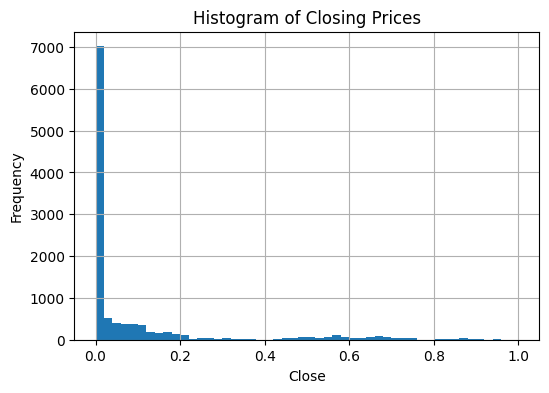

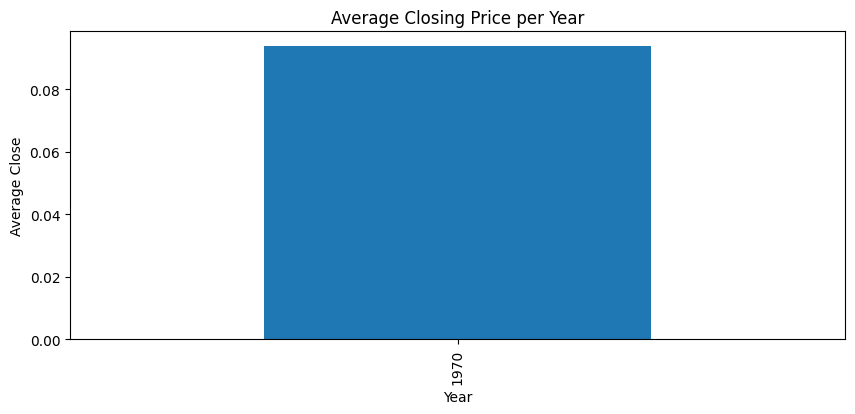

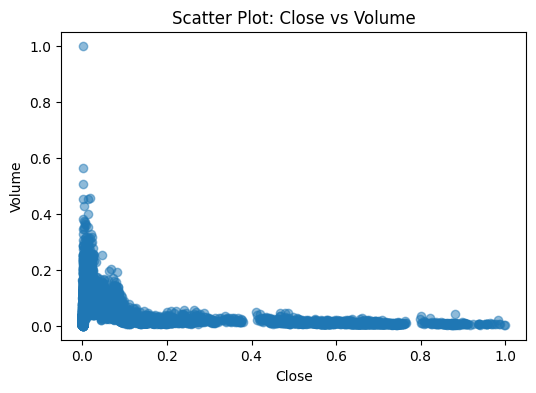

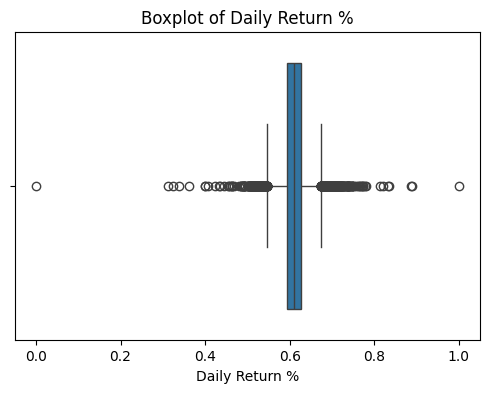

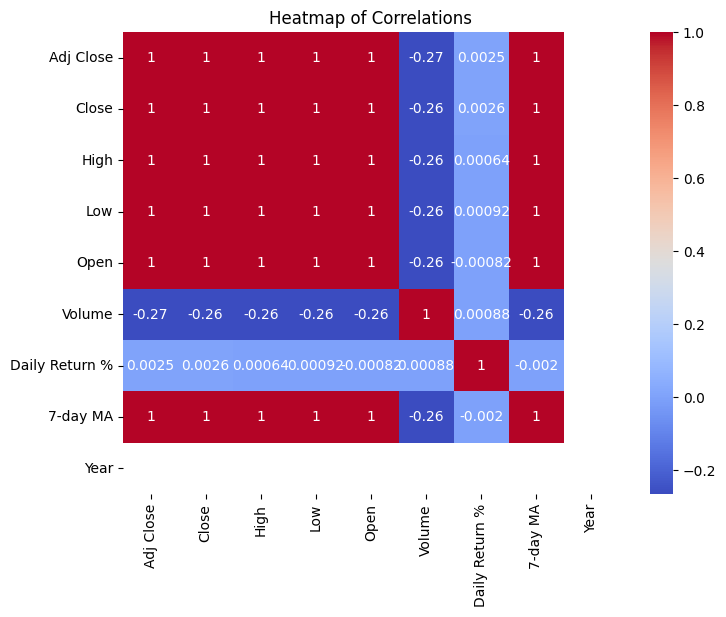

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of closing prices
plt.figure(figsize=(6,4))
df['Close'].hist(bins=50)
plt.title("Histogram of Closing Prices")
plt.xlabel("Close")
plt.ylabel("Frequency")
plt.show()

# Bar plot of average yearly closing prices
df.index = pd.to_datetime(df.index, errors='coerce')   # make index datetime
df['Year'] = df.index.year
plt.figure(figsize=(10,4))
df.groupby('Year')['Close'].mean().plot(kind='bar')
plt.title("Average Closing Price per Year")
plt.ylabel("Average Close")
plt.show()

# Scatter plot (Close vs Volume)
plt.figure(figsize=(6,4))
plt.scatter(df['Close'], df['Volume'], alpha=0.5)
plt.title("Scatter Plot: Close vs Volume")
plt.xlabel("Close")
plt.ylabel("Volume")
plt.show()

# Boxplot of Daily Return %
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Daily Return %'])
plt.title("Boxplot of Daily Return %")
plt.show()

# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Heatmap of Correlations")
plt.show()


In [21]:
from sklearn import datasets

# loading iris dataset as example
iris = datasets.load_iris()
print("Iris dataset shape:", iris.data.shape)

# checking feature names quickly
print("Iris features:", iris.feature_names[:5])



Iris dataset shape: (150, 4)
Iris features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
import numpy as np
from sklearn.impute import SimpleImputer

# just to demo, let's create a small copy with some NaNs
demo_df = df[['Close','Volume']].copy()
demo_df.iloc[0,0] = np.nan   # set first row 'Close' to NaN
demo_df.iloc[1,1] = np.nan   # set second row 'Volume' to NaN

print("Before Imputation:\n", demo_df.head())

# using SimpleImputer to replace NaNs with column mean
imputer = SimpleImputer(strategy='mean')
demo_df[['Close','Volume']] = imputer.fit_transform(demo_df[['Close','Volume']])

print("\nAfter Imputation:\n", demo_df.head())


Before Imputation:
                                   Close    Volume
1970-01-01 00:00:00.000000000       NaN  0.063198
1970-01-01 00:00:00.000000001  0.000280       NaN
1970-01-01 00:00:00.000000002  0.000246  0.014246
1970-01-01 00:00:00.000000003  0.000256  0.011647
1970-01-01 00:00:00.000000004  0.000269  0.009897

After Imputation:
                                   Close    Volume
1970-01-01 00:00:00.000000000  0.093874  0.063198
1970-01-01 00:00:00.000000001  0.000280  0.042504
1970-01-01 00:00:00.000000002  0.000246  0.014246
1970-01-01 00:00:00.000000003  0.000256  0.011647
1970-01-01 00:00:00.000000004  0.000269  0.009897


In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding example
le = LabelEncoder()
df['Year_encoded'] = le.fit_transform(df['Year'])
print("Unique years (encoded):", df['Year_encoded'].unique()[:10])

# One Hot Encoding example
ohe = OneHotEncoder(sparse_output=False)
year_ohe = ohe.fit_transform(df[['Year']])

print("One-hot encoded shape:", year_ohe.shape)


Unique years (encoded): [0]
One-hot encoded shape: (11107, 1)


In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

scaled_std = scaler1.fit_transform(df[['Close','Volume']])
scaled_minmax = scaler2.fit_transform(df[['Close','Volume']])

print("StandardScaler (first 5 rows):\n", scaled_std[:5])
print("\nMinMaxScaler (first 5 rows):\n", scaled_minmax[:5])



StandardScaler (first 5 rows):
 [[-0.48250811  0.45869972]
 [-0.48264145 -0.4167412 ]
 [-0.48281927 -0.62625301]
 [-0.48276371 -0.68384868]
 [-0.48269702 -0.72264717]]

MinMaxScaler (first 5 rows):
 [[0.00030598 0.0631981 ]
 [0.00028013 0.02369891]
 [0.00024565 0.01424591]
 [0.00025642 0.01164724]
 [0.00026935 0.00989668]]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error

# ----- Classification (predict if return is positive or negative) -----
df['Target'] = (df['Daily Return %'] > 0).astype(int)   # 1 if positive return, 0 otherwise

X = df[['Close','Volume','7-day MA']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# ----- Regression (predict Close price) -----
X_reg = df[['Open','High','Low','Volume']]
y_reg = df['Close']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)

import numpy as np

# Regression evaluation
print("\nLinear Regression RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))
print("Linear Regression MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("Linear Regression R^2:", reg.score(X_test_r, y_test_r))



Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2222

    accuracy                           1.00      2222
   macro avg       1.00      1.00      1.00      2222
weighted avg       1.00      1.00      1.00      2222

Confusion Matrix:
 [[2222]]

Decision Tree Accuracy: 1.0

Linear Regression RMSE: 0.0012493221569884333
Linear Regression MAE: 0.0004259000561672823
Linear Regression R^2: 0.9999568595658525


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
